In [1]:
import pandas as pd


lista_conceptos = [
    "DiarioTs",
    "Humedad", 
    "PresionQFF", 
    "Temperatura", 
    "Viento", 
    "Agua24Horas", 
    "Agua6Horas", 
    "DiarioRR", 
    "PresionQFE", 
    "PuntoRocio", 
    "TMaxima", 
    "TMinima", 
    "IndiceUVB"
]



In [2]:

concepto = "Temperatura"
ruta = f"data/{concepto}_consolidado.csv"

df_temp = pd.read_csv(ruta, delimiter=";")

# Verificar el total de filas del DataFrame
total_filas = df_temp.shape[0]
print(f'Total de filas: {total_filas}\n')

# Verificar la cantidad de valores nulos en la columna "momento"
nulos_momento = df_temp["momento"].isna().sum()
print(f'Cantidad de valores nulos en "momento": {nulos_momento}\n')

# Convertir la columna "momento" a tipo datetime con formato especificado
df_temp['momento'] = pd.to_datetime(df_temp['momento'], format='%d-%m-%Y %H:%M:%S', errors='coerce')

# Verificar nuevamente la cantidad de valores nulos en la columna "momento"
nulos_momento = df_temp["momento"].isna().sum()
print(f'Cantidad de valores nulos en "momento" después de la conversión: {nulos_momento}\n')

df_temp["año"] = df_temp["momento"].dt.year
df_temp["mes"] = df_temp["momento"].dt.month


# Verificar el tipo de datos de las columnas
print(df_temp.dtypes,'\n')

df_temp.head()

Total de filas: 11764510

Cantidad de valores nulos en "momento": 0

Cantidad de valores nulos en "momento" después de la conversión: 0

CodigoNacional             int64
momento           datetime64[ns]
Ts_Valor                 float64
año                        int32
mes                        int32
dtype: object 



,CodigoNacional,momento,Ts_Valor,año,mes
0,180005,1955-01-01 12:00:00,21.6,1955,1
1,180005,1955-01-01 15:00:00,25.5,1955,1
2,180005,1955-01-01 18:00:00,28.5,1955,1
3,180005,1955-01-01 21:00:00,27.1,1955,1
4,180005,1955-01-02 12:00:00,24.0,1955,1


In [9]:

concepto = "DiarioTs"
ruta = f"data/{concepto}_consolidado.csv"

df = pd.read_csv(ruta, delimiter=";")

# Verificar el total de filas del DataFrame
total_filas = df.shape[0]
print(f'Total de filas: {total_filas}\n')

# Verificar la cantidad de valores nulos en la columna "momento"
nulos_momento = df["momento"].isna().sum()
print(f'Cantidad de valores nulos en "momento": {nulos_momento}\n')

# Convertir la columna "momento" a tipo datetime con formato especificado
df['momento'] = pd.to_datetime(df['momento'], format='%d-%m-%Y %H:%M:%S', errors='coerce')

# Verificar nuevamente la cantidad de valores nulos en la columna "momento"
nulos_momento = df["momento"].isna().sum()
print(f'Cantidad de valores nulos en "momento" después de la conversión: {nulos_momento}\n')

df["año"] = df["momento"].dt.year
df["mes"] = df["momento"].dt.month


# Verificar el tipo de datos de las columnas
print(df.dtypes,'\n')

df.head()

Total de filas: 826378

Cantidad de valores nulos en "momento": 0

Cantidad de valores nulos en "momento" después de la conversión: 0

CodigoNacional             int64
momento           datetime64[ns]
MediaCli_Valor           float64
MediaAri_Valor           float64
NumDatos_Valor           float64
Ts00_Valor               float64
Ts12_Valor               float64
Maxima_Valor             float64
FechaMax_Valor           float64
Minima_Valor             float64
FechaMin_Valor           float64
FechaPro_Valor           float64
año                        int32
mes                        int32
dtype: object 



,CodigoNacional,momento,MediaCli_Valor,MediaAri_Valor,NumDatos_Valor,Ts00_Valor,Ts12_Valor,Maxima_Valor,FechaMax_Valor,Minima_Valor,FechaMin_Valor,FechaPro_Valor,año,mes
0,180005,1955-01-01 12:00:00,NaN,25.7,4.0,NaN,21.6,28.5,NaN,NaN,NaN,NaN,1955,1
1,180005,1955-01-02 12:00:00,NaN,27.3,4.0,NaN,24.0,31.2,NaN,NaN,NaN,NaN,1955,1
2,180005,1955-01-03 12:00:00,NaN,26.6,4.0,NaN,23.0,30.8,NaN,NaN,NaN,NaN,1955,1
3,180005,1955-01-04 12:00:00,NaN,26.2,4.0,NaN,22.7,31.4,NaN,NaN,NaN,NaN,1955,1
4,180005,1955-01-05 12:00:00,NaN,26.7,4.0,NaN,23.5,31.8,NaN,NaN,NaN,NaN,1955,1


In [3]:
### Lectura de estaciones ### 

dt_df = pd.read_html("data/CatastrodeEstacionesdelSistemaSACLIM_2025-02-16_21_13.xls")[0]

print(dt_df.dtypes)

lista_estaciones = dt_df["Nombre"].values

print("Cantidad de estaciones:", len(lista_estaciones),"\n")
print(lista_estaciones,"\n")

dt_df.head()

dt_df.to_csv("data/CatastrodeEstacionesdelSistemaSACLIM.csv")

NÂ°                  int64
Codigo Nacional      int64
Codigo WIGOS        object
Codigo OACI         object
Nombre              object
Latitud            float64
Longitud           float64
Altitud (Mts)        int64
Propietario         object
dtype: object
Cantidad de estaciones: 46 

['Chacalluta, Arica Ap.' 'Diego Aracena Iquique Ap.' 'El Loa, Calama Ad.'
 'Cerro Moreno Antofagasta Ap.' 'Mataveri Isla de Pascua Ap.'
 'Desierto de Atacama, Caldera Ad.' 'La Florida, La Serena Ad.'
 'Vina del Mar Ad. (Torquemada)' 'Los Libertadores' 'Rodelillo, Ad.'
 'Eulogio Sanchez, Tobalaba Ad.' 'Quinta Normal, Santiago'
 'Pudahuel Santiago' 'Santo Domingo, Ad.'
 'Juan Fernandez, Estacion Meteorologica.' 'La Punta, Juan Fernandez Ad.'
 'El Colorado' 'Lo Prado Cerro San Francisco' 'San Jose Guayacan'
 'El Paico' 'Peldehue Ad.' 'General Freire, Curico Ad.'
 "General Bernardo O'Higgins, Chillan Ad." 'Carriel Sur, Concepcion Ap.'
 'Termas de Chillan' 'Maria Dolores, Los Angeles Ad.' 'La Araucania Ad.'
 '

In [4]:
# Filtrar las estaciones cuyo nombre contiene la palabra "Santiago"
estaciones_santiago = dt_df[dt_df['Nombre'].str.contains('Santiago', case=False, na=False)]

# Mostrar el resultado
print(estaciones_santiago)

codigo_quinta_normal = 330020


estacion_antartica = dt_df[dt_df['Nombre'].str.contains('Base Antartica', case=False, na=False)]

print(estacion_antartica)

# Filtrar las estaciones cuyo nombre contiene la palabra "Santiago"
estaciones_serena = dt_df[dt_df['Nombre'].str.contains('Serena', case=False, na=False)]

codigo_antartica = 950002

# Mostrar el resultado
print(estaciones_serena)

codigo_serena = 290004

    NÂ°  Codigo Nacional     Codigo WIGOS Codigo OACI  \
11   11           330020  0-20000-0-85577        SCQN   
12   12           330021  0-20000-0-85574        SCEL   

                     Nombre   Latitud  Longitud  Altitud (Mts) Propietario  
11  Quinta Normal, Santiago -33.44500 -70.68278            520         DMC  
12        Pudahuel Santiago -33.37833 -70.78778            474         DMC  
    NÂ°  Codigo Nacional     Codigo WIGOS Codigo OACI  \
44   44           950002  0-20000-0-89057        SCBP   
45   45           950003  0-20000-0-89059        SCBO   

                                Nombre   Latitud  Longitud  Altitud (Mts)  \
44         Arturo Prat, Base Antartica -62.47861 -59.66417              5   
45  Bernardo O`Higgins, Base Antartica -63.32083 -57.89944             10   

   Propietario  
44  DIRECTEMAR  
45         DMC  
   NÂ°  Codigo Nacional     Codigo WIGOS Codigo OACI  \
6    6           290004  0-20000-0-85488        SCSE   

                      Nombre 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

codigo_a_evaluar = codigo_quinta_normal
#codigo_a_evaluar = codigo_serena
#codigo_a_evaluar = 950003

# Filtrar el DataFrame para que solo tenga datos con CodigoNacional == 330020 y excluir el año 2025
df_filtrado = df.copy()[(df['CodigoNacional'] == codigo_a_evaluar) & (df['momento'].dt.year != 2025)]

# Calcular el promedio anual de la columna 'Ts00_Valor'
promedio_anual_ts00 = df_filtrado.groupby('año')['Ts00_Valor'].mean()

# Mostrar el promedio anual
print(promedio_anual_ts00)

print(promedio_anual_ts00.min())

# # Crear gráfico de línea del promedio anual
plt.figure(figsize=(10, 6))
promedio_anual_ts00.plot(kind='line', marker='o', color='blue', linestyle='-', linewidth=2, markersize=6, label='Promedio Anual')

# Ajustar una línea de tendencia (polinomio de grado 1)
años = promedio_anual_ts00.index
valores = promedio_anual_ts00.values
coeficientes = np.polyfit(años, valores, 1)  # Ajustar una línea recta (grado 1)
tendencia = np.poly1d(coeficientes)  # Crear una función para la línea de tendencia

# Graficar la línea de tendencia
plt.plot(años, tendencia(años), color='red', linestyle='--', linewidth=2, label='Línea de Tendencia')

# Títulos y etiquetas
plt.title(f'Promedio Anual de Ts00_Valor (CodigoNacional = {codigo_a_evaluar})', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Promedio de Ts00_Valor', fontsize=12)

# Ajustar el límite del eje Y
plt.ylim(promedio_anual_ts00.min(), promedio_anual_ts00.max())

# Añadir cuadrícula para mejor lectura
plt.grid(True, linestyle='--', alpha=0.6)

# Mostrar leyenda
plt.legend()

# Mostrar el gráfico
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

NameError: name 'df' is not defined

Promedio Anual:
año
1950          NaN
1951          NaN
1952          NaN
1953          NaN
1954          NaN
          ...    
2020    16.805738
2021    16.102192
2022    16.086575
2023    16.807397
2024    16.468306
Name: Ts00_Valor, Length: 75, dtype: float64

Media Móvil de 4 años:
año
1950          NaN
1951          NaN
1952          NaN
1953          NaN
1954          NaN
          ...    
2020    16.693558
2021    16.592530
2022    16.472325
2023    16.450476
2024    16.366118
Name: Ts00_Valor, Length: 75, dtype: float64


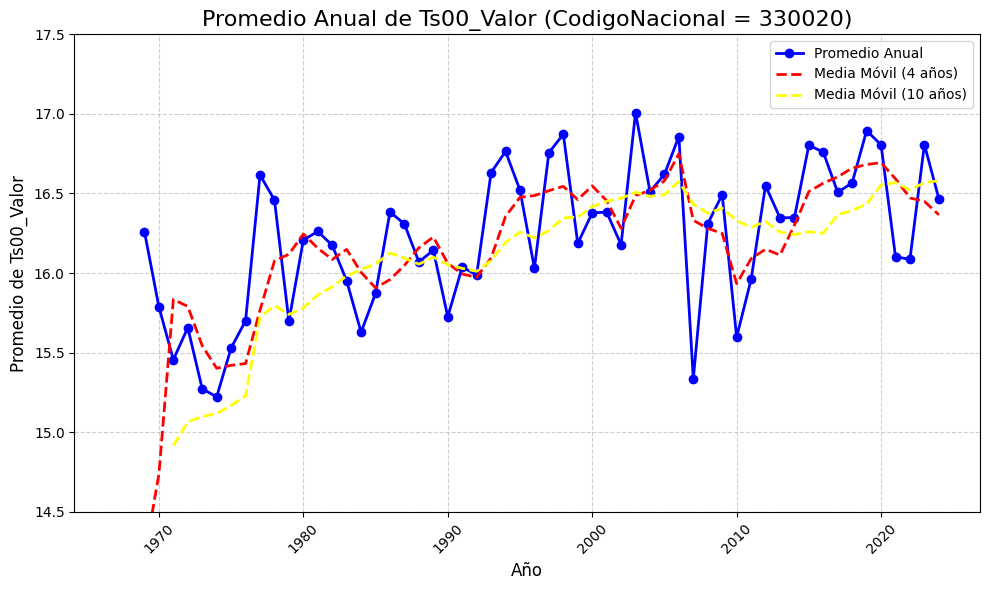

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

# Asegurarse de que la columna 'momento' sea de tipo datetime
df['momento'] = pd.to_datetime(df['momento'])

# Filtrar el DataFrame para que solo tenga datos con CodigoNacional == 330020
df_filtrado = df.copy()[(df['CodigoNacional'] == 330020) & (df['momento'].dt.year != 2025)]

# Calcular el promedio anual de la columna 'Ts00_Valor'
df_filtrado['año'] = df_filtrado['momento'].dt.year  # Extraer el año de la columna 'momento'
promedio_anual_ts00 = df_filtrado.groupby('año')['Ts00_Valor'].mean()

# Calcular la media móvil de 4 años
media_movil_4 = promedio_anual_ts00.rolling(window=4, min_periods=2).mean()

media_movil_7 = promedio_anual_ts00.rolling(window=7, min_periods=3).mean()

media_movil_10 = promedio_anual_ts00.rolling(window=10, min_periods=4).mean()

# Mostrar el promedio anual y la media móvil
print("Promedio Anual:")
print(promedio_anual_ts00)
print("\nMedia Móvil de 4 años:")
print(media_movil_4)

# Crear gráfico de línea del promedio anual y la media móvil
plt.figure(figsize=(10, 6))
promedio_anual_ts00.plot(kind='line', marker='o', color='blue', linestyle='-', linewidth=2, markersize=6, label='Promedio Anual')
media_movil_4.plot(kind='line', color='red', linestyle='--', linewidth=2, label='Media Móvil (4 años)')
#media_movil_7.plot(kind='line', color='green', linestyle='--', linewidth=2, label='Media Móvil (7 años)')
media_movil_10.plot(kind='line', color='yellow', linestyle='--', linewidth=2, label='Media Móvil (10 años)')

# Títulos y etiquetas
plt.title('Promedio Anual de Ts00_Valor (CodigoNacional = 330020)', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Promedio de Ts00_Valor', fontsize=12)

# Ajustar el límite del eje Y
plt.ylim(14.5, 17.5)

# Añadir cuadrícula para mejor lectura
plt.grid(True, linestyle='--', alpha=0.6)

# Mostrar leyenda
plt.legend()

# Mostrar el gráfico
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Promedio Anual:
año
1950          NaN
1951          NaN
1952          NaN
1953          NaN
1954          NaN
          ...    
2020    11.021585
2021    10.619452
2022    10.590959
2023    11.506575
2024    11.129781
Name: Ts12_Valor, Length: 75, dtype: float64

Media Móvil de 4 años:
año
1950          NaN
1951          NaN
1952          NaN
1953          NaN
1954          NaN
          ...    
2020    11.058410
2021    10.890944
2022    10.847930
2023    10.934643
2024    10.961692
Name: Ts12_Valor, Length: 75, dtype: float64


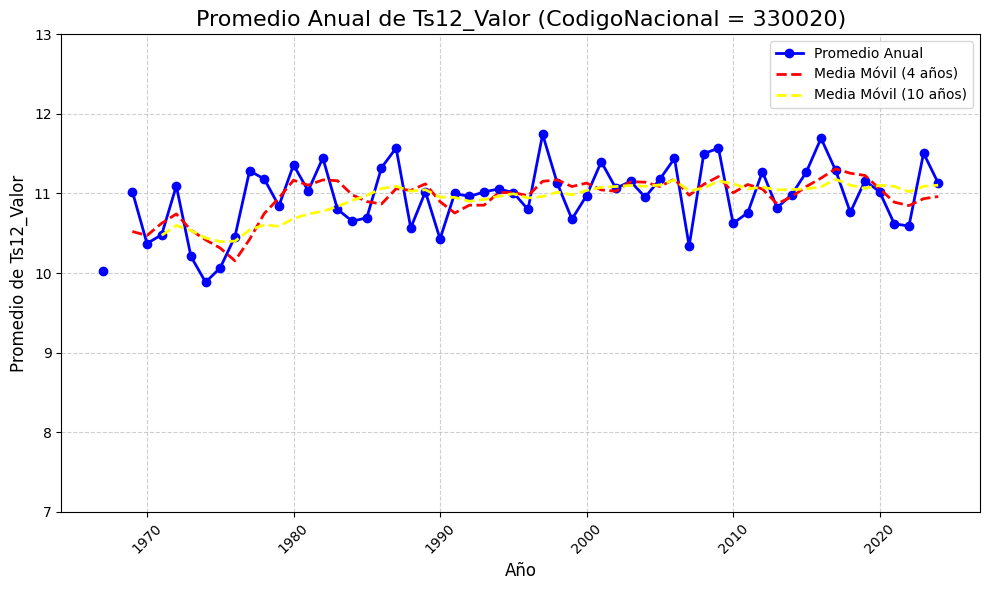

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Asegurarse de que la columna 'momento' sea de tipo datetime
df['momento'] = pd.to_datetime(df['momento'])

# Filtrar el DataFrame para que solo tenga datos con CodigoNacional == 330020
df_filtrado = df.copy()[(df['CodigoNacional'] == 330020) & (df['momento'].dt.year != 2025)]

# Calcular el promedio anual de la columna 'Ts00_Valor'
df_filtrado['año'] = df_filtrado['momento'].dt.year  # Extraer el año de la columna 'momento'
promedio_anual_ts00 = df_filtrado.groupby('año')['Ts12_Valor'].mean()

# Calcular la media móvil de 4 años
media_movil_4 = promedio_anual_ts00.rolling(window=4, min_periods=2).mean()

media_movil_7 = promedio_anual_ts00.rolling(window=7, min_periods=3).mean()

media_movil_10 = promedio_anual_ts00.rolling(window=10, min_periods=4).mean()

# Mostrar el promedio anual y la media móvil
print("Promedio Anual:")
print(promedio_anual_ts00)
print("\nMedia Móvil de 4 años:")
print(media_movil_4)

# Crear gráfico de línea del promedio anual y la media móvil
plt.figure(figsize=(10, 6))
promedio_anual_ts00.plot(kind='line', marker='o', color='blue', linestyle='-', linewidth=2, markersize=6, label='Promedio Anual')
media_movil_4.plot(kind='line', color='red', linestyle='--', linewidth=2, label='Media Móvil (4 años)')
#media_movil_7.plot(kind='line', color='green', linestyle='--', linewidth=2, label='Media Móvil (7 años)')
media_movil_10.plot(kind='line', color='yellow', linestyle='--', linewidth=2, label='Media Móvil (10 años)')

# Títulos y etiquetas
plt.title('Promedio Anual de Ts12_Valor (CodigoNacional = 330020)', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Promedio de Ts12_Valor', fontsize=12)

# Ajustar el límite del eje Y
plt.ylim(7, 13)

# Añadir cuadrícula para mejor lectura
plt.grid(True, linestyle='--', alpha=0.6)

# Mostrar leyenda
plt.legend()

# Mostrar el gráfico
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

año
1950    15.307540
1951    16.204749
1952    16.578689
1953    15.561187
1954    15.575342
          ...    
2020    15.634284
2021    15.100902
2022    15.048639
2023    15.774457
2024    15.394490
Name: Ts_Valor, Length: 75, dtype: float64
14.279159638092317


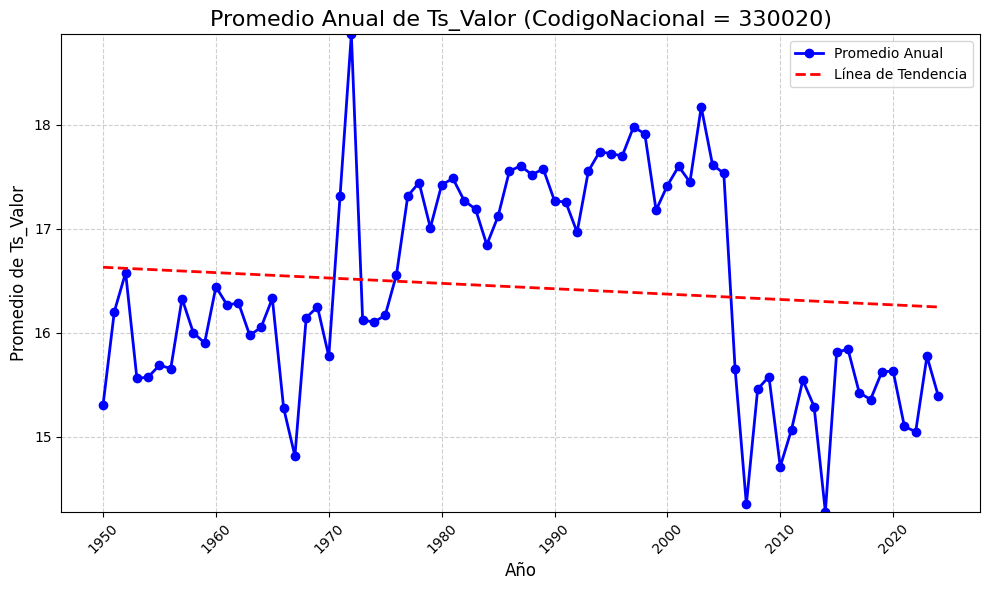

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

codigo_a_evaluar = codigo_quinta_normal
#codigo_a_evaluar = codigo_serena
#codigo_a_evaluar = 950003

# Filtrar el DataFrame para que solo tenga datos con CodigoNacional == 330020 y excluir el año 2025
df_temp_filtrado = df_temp.copy()[(df_temp['CodigoNacional'] == codigo_a_evaluar) & (df_temp['momento'].dt.year != 2025)]

# Calcular el promedio anual de la columna 'Ts00_Valor'
promedio_anual_ts00 = df_temp_filtrado.groupby('año')['Ts_Valor'].mean()

# Mostrar el promedio anual
print(promedio_anual_ts00)

print(promedio_anual_ts00.min())

# # Crear gráfico de línea del promedio anual
plt.figure(figsize=(10, 6))
promedio_anual_ts00.plot(kind='line', marker='o', color='blue', linestyle='-', linewidth=2, markersize=6, label='Promedio Anual')

# Ajustar una línea de tendencia (polinomio de grado 1)
años = promedio_anual_ts00.index
valores = promedio_anual_ts00.values
coeficientes = np.polyfit(años, valores, 1)  # Ajustar una línea recta (grado 1)
tendencia = np.poly1d(coeficientes)  # Crear una función para la línea de tendencia

# Graficar la línea de tendencia
plt.plot(años, tendencia(años), color='red', linestyle='--', linewidth=2, label='Línea de Tendencia')

# Títulos y etiquetas
plt.title(f'Promedio Anual de Ts_Valor (CodigoNacional = {codigo_a_evaluar})', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Promedio de Ts_Valor', fontsize=12)

# Ajustar el límite del eje Y
plt.ylim(promedio_anual_ts00.min(), promedio_anual_ts00.max())

# Añadir cuadrícula para mejor lectura
plt.grid(True, linestyle='--', alpha=0.6)

# Mostrar leyenda
plt.legend()

# Mostrar el gráfico
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()